In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load all CSV files for the years 2017 to 2023
file_paths = ['Data/disruptions-2017.csv','Data/disruptions-2018.csv','Data/disruptions-2019.csv','Data/disruptions-2020.csv','Data/disruptions-2021.csv','Data/disruptions-2022.csv','Data/disruptions-2023.csv']
dataframes = [pd.read_csv(file) for file in file_paths]

# Concatenate all dataframes into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

# Extract the year from the 'start_time' column and add it as a new column
data['year'] = pd.to_datetime(data['start_time']).dt.year

# Quick check if dataframes are concatenated correctly
print(data['year'])

# Prints all unique trips found in the files
print(data['rdt_lines'].unique())

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
35201    2023
35202    2023
35203    2023
35204    2023
35205    2023
Name: year, Length: 35206, dtype: int32
['Tiel - Utrecht Centraal' 'Arnhem Centraal - Nijmegen'
 'Alphen a/d Rijn - Gouda' 'Breda - Rotterdam Centraal (HSL)'
 'Leeuwarden - Stavoren' 'Almere Oostvaarders - Utrecht Centraal'
 'Amersfoort - Amsterdam Centraal, Amersfoort - Schiphol Airport, Amsterdam Centraal - Lelystad Centrum, Lelystad Centrum - Schiphol Airport'
 'Leeuwarden - Zwolle'
 'Liège-Guillemins - Maastricht, Maastricht - Maastricht Randwyck'
 'Alkmaar - Hoorn'
 'Amersfoort - Schiphol Airport, Leiden Centraal - Schiphol Airport, Lelystad Centrum - Schiphol Airport'
 'Den Haag Centraal - Leiden Centraal, Den Haag HS - Leiden Centraal'
 'Amersfoort - Utrecht Centraal' 'Arnhem Centraal - Winterswijk'
 'Amersfoort - Schiphol Airport, Lelystad Centrum - Schiphol Airport, Schiphol Airport - Utrecht Centraal'
 'Amersfoort - Zwolle' 

In [3]:
# Calculate average delay per line and year
average_delay_per_line = data.groupby(['rdt_lines', 'year'])['duration_minutes'].mean().reset_index()
average_delay_per_line.columns = ['Traject', 'Year', 'Average_Delay_Minutes']

# Define the specific trajectories needed from 'Trips'
needed_trajects = [
    "Zaandam - Schiphol Airport",
    "Hoorn - Zaandam",
    "Amsterdam Centraal - Hilversum",
    "Tilburg - 's-Hertogenbosch",
    "Hilversum - Schiphol Airport",
    "Schiphol Airport - Almere Centrum",
    "Amsterdam Centraal - Hoorn",
    "Utrecht Centraal - 's-Hertogenbosch",
    "'s-Hertogenbosch - Utrecht Centraal",
    "Zaandam - Hoorn"
]

# Rename columns for clarity
average_delay_per_line.columns = ['Traject', 'Year', 'Average_Delay_Minutes']
# Filter average delay data to include only the needed trajects
filtered_data = average_delay_per_line[average_delay_per_line['Traject'].isin(needed_trajects)]

print(filtered_data['Traject'])

110    's-Hertogenbosch - Utrecht Centraal
111    's-Hertogenbosch - Utrecht Centraal
112    's-Hertogenbosch - Utrecht Centraal
113    's-Hertogenbosch - Utrecht Centraal
114    's-Hertogenbosch - Utrecht Centraal
115    's-Hertogenbosch - Utrecht Centraal
116    's-Hertogenbosch - Utrecht Centraal
726             Amsterdam Centraal - Hoorn
727             Amsterdam Centraal - Hoorn
728             Amsterdam Centraal - Hoorn
729             Amsterdam Centraal - Hoorn
730             Amsterdam Centraal - Hoorn
731             Amsterdam Centraal - Hoorn
732             Amsterdam Centraal - Hoorn
Name: Traject, dtype: object


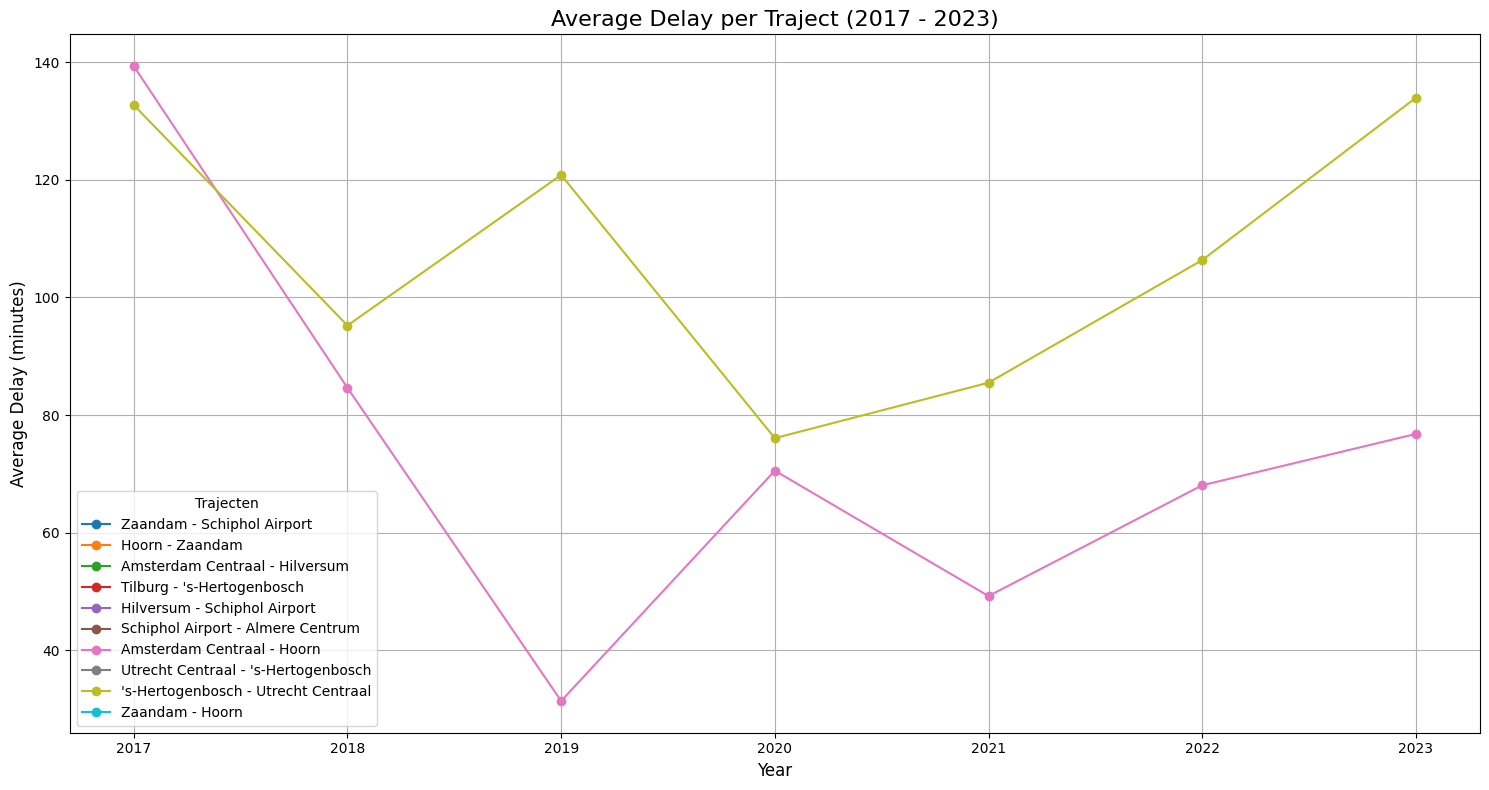

In [4]:
# Check if filtered data is empty
if filtered_data.empty:
    print("No data found for the specified trajects. Please check traject names for exact matches.")
else:
    # Create the line graph
    plt.figure(figsize=(15, 8))

# Plot the graph for each trip
for traject in needed_trajects:
    traject_data = filtered_data[filtered_data['Traject'] == traject]
    plt.plot(traject_data['Year'], traject_data['Average_Delay_Minutes'], marker='o', label=traject)


plt.title('Average Delay per Traject (2017 - 2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)

plt.legend(title="Trajecten")

plt.grid(True)

plt.tight_layout()
plt.show()